# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

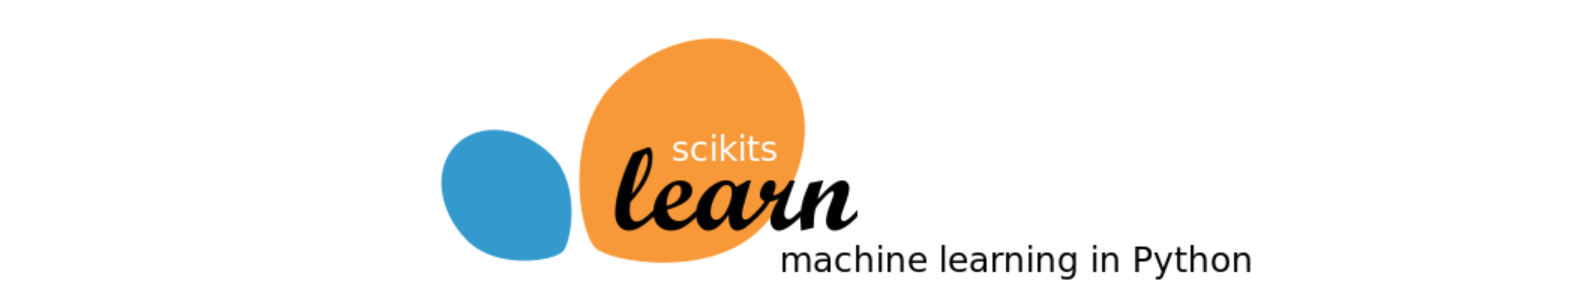

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from file1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [47]:
#importing Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
#Reading the file
df = pd.read_csv("file1.csv")
df.columns = ['A','B','C','D','E','F','G','H','I','J']
df.head()

A   B   C  D  E   F  G  H  I  J
0  5   4   4  5  7  10  3  2  1  2
1  3   1   1  1  2   2  3  1  1  2
2  6   8   8  1  3   4  3  7  1  2
3  4   1   1  3  2   1  3  1  1  2
4  8  10  10  8  7  10  9  7  1  4

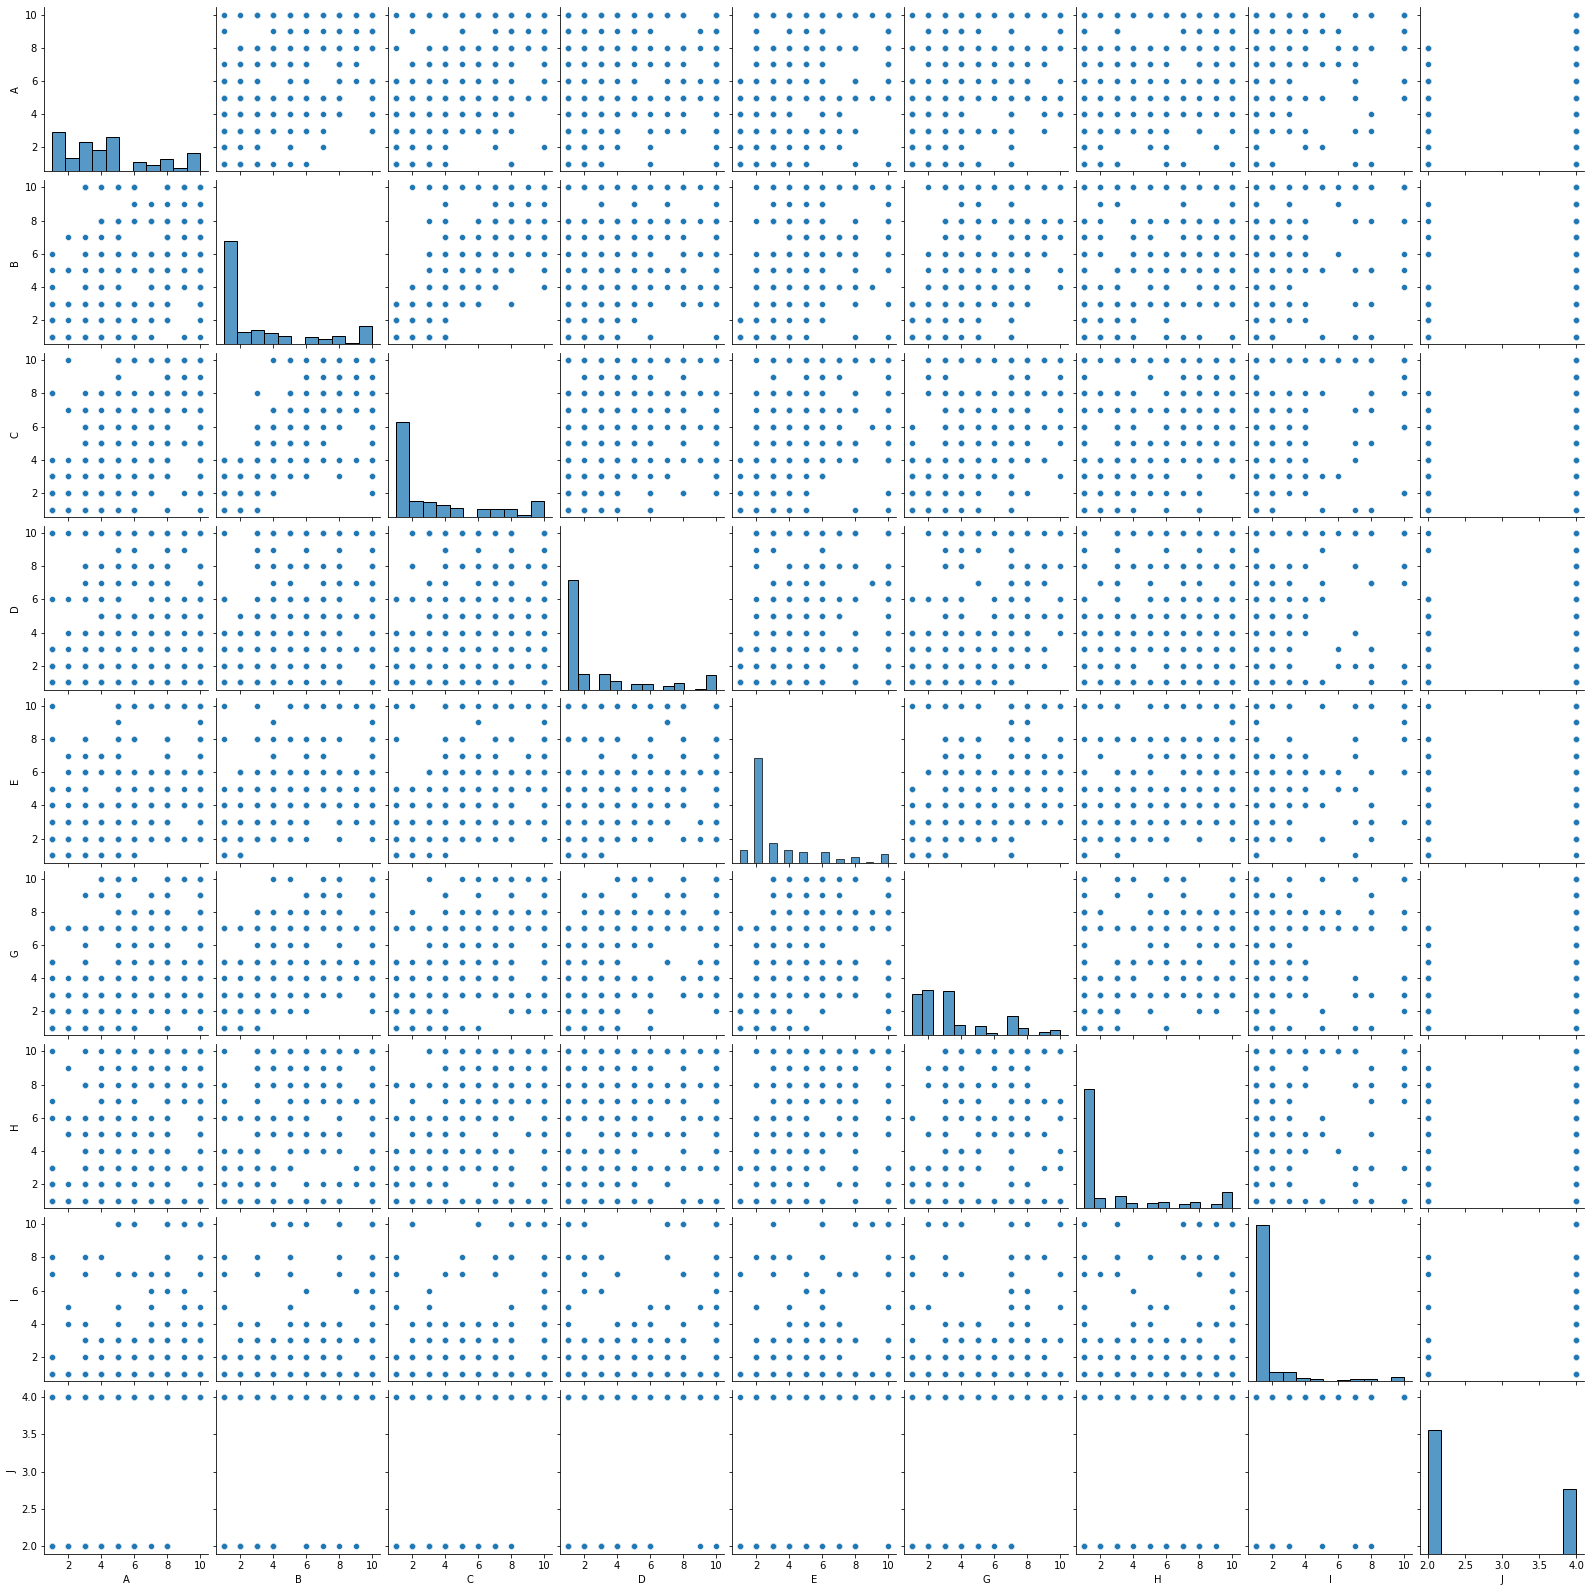

In [49]:
#To select the two best features, pairplot all the features
sns.pairplot(df)

In [50]:
df.corr()

A         B         C         D         E         G         H  \
A  1.000000  0.645366  0.655089  0.486699  0.522108  0.558511  0.536176   
B  0.645366  1.000000  0.906814  0.705397  0.751674  0.755824  0.722699   
C  0.655089  0.906814  1.000000  0.682871  0.719524  0.736066  0.719272   
D  0.486699  0.705397  0.682871  1.000000  0.599402  0.666759  0.603132   
E  0.522108  0.751674  0.719524  0.599402  1.000000  0.616108  0.628704   
G  0.558511  0.755824  0.736066  0.666759  0.616108  1.000000  0.665914   
H  0.536176  0.722699  0.719272  0.603132  0.628704  0.665914  1.000000   
I  0.350176  0.458548  0.438756  0.417476  0.478975  0.344118  0.428185   
J  0.716509  0.817772  0.818794  0.696605  0.682618  0.756732  0.712067   

          I         J  
A  0.350176  0.716509  
B  0.458548  0.817772  
C  0.438756  0.818794  
D  0.417476  0.696605  
E  0.478975  0.682618  
G  0.344118  0.756732  
H  0.428185  0.712067  
I  1.000000  0.423008  
J  0.423008  1.000000

In [51]:
df.drop(['A','D','E','F','G','H','I','J'], axis = 1, inplace = True)
df.head()

B   C
0   4   4
1   1   1
2   8   8
3   1   1
4  10  10

Text(0, 0.5, 'C')

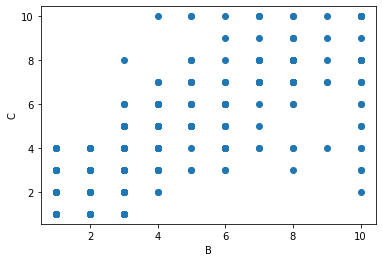

In [52]:
x = df['B']
y = df['C']
plt.scatter(x,y)
plt.xlabel('B')
plt.ylabel('C')

In [53]:
from sklearn.cluster import KMeans

In [54]:
K = np.arange(1,10)
SSD = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df)
    SSD.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [55]:
km.cluster_centers_

array([[1.03523035, 1.0704607 ],
       [4.825     , 6.475     ],
       [9.96491228, 9.75438596],
       [1.78181818, 3.58181818],
       [7.92307692, 7.35897436],
       [4.85714286, 4.26785714],
       [9.46153846, 4.07692308],
       [2.68518519, 2.07407407],
       [6.66666667, 9.53333333]])

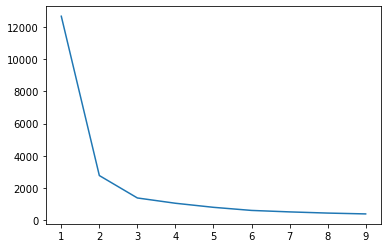

In [56]:
plt.plot(K,SSD)

In [70]:
#From the above elbow method graph, we know that, 2 and 3 would be a better number for the k value that is number of clusters.

In [58]:
from sklearn.metrics import silhouette_score
sil = []
K = np.arange(2,11)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sil.append(silhouette_score(df,km.labels_,metric='euclidean'))

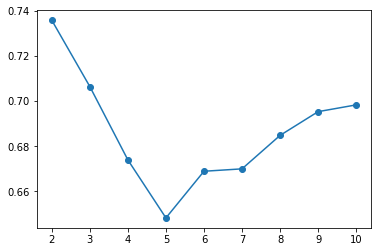

In [59]:
plt.plot(K,sil,'-o')

In [60]:
kmean = KMeans(n_clusters = 2)
kmean.fit(df)

KMeans(n_clusters=2)

In [61]:
kmean.labels_

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [62]:
kmean.cluster_centers_

array([[1.49414063, 1.6484375 ],
       [7.66129032, 7.51075269]])

In [63]:
kmean.inertia_

2776.840956821233

In [64]:
df['cluster'] = kmean.labels_
df.head()

B   C  cluster
0   4   4        0
1   1   1        0
2   8   8        1
3   1   1        0
4  10  10        1

In [65]:
cluster0 = df[df.cluster == 0]
cluster0.head()

B  C  cluster
0  4  4        0
1  1  1        0
3  1  1        0
5  1  1        0
6  1  2        0

In [66]:
cluster1 = df[df.cluster == 1]
cluster1.head()

B   C  cluster
2    8   8        1
4   10  10        1
13   7   5        1
14   4   6        1
17   7   7        1

In [67]:
# cluster2 = df[df.cluster == 2]
# cluster2.head()

In [68]:
centroids = pd.DataFrame(data = kmean.cluster_centers_, columns=['x','y'])
centroids

x         y
0  1.494141  1.648437
1  7.661290  7.510753

In [69]:
plt.scatter(cluster0['B'], cluster0['C'], color = 'blue')
plt.scatter(cluster1['B'], cluster1['C'], color = 'green')
# plt.scatter(cluster2['B'], cluster2['C'], color = 'red')
plt.scatter(centroids.x, centroids.y, color='black', marker = '*')

In [71]:
#In the above graph, we can clearly see two different clusters formed with its centroids marked in black color.

# Part B

### INSTRUCTIONS
1. Read data from file2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [72]:
df1 = pd.read_csv("file2.csv")
df1.columns = ['x','y']
df1.head()

x         y
0  1.557994  0.255070
1 -0.955949  1.675355
2 -1.204858  0.037380
3 -0.612919 -0.390663
4  1.437055 -1.832274

In [73]:
p = df1['x']
q = df1['y']
plt.scatter(p,q)
plt.xlabel['x']
plt.ylabel['y']
plt.show()

TypeError: 'function' object is not subscriptable

In [79]:
df1.head()

x         y
0  1.557994  0.255070
1 -0.955949  1.675355
2 -1.204858  0.037380
3 -0.612919 -0.390663
4  1.437055 -1.832274

In [80]:
from sklearn.cluster import KMeans

In [81]:
K = np.arange(1,10)
SSD = []
for k in K:
    km1 = KMeans(n_clusters = k)
    km1.fit(df1)
    SSD.append(km1.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
km1.cluster_centers_

array([[-1.15936345, -0.93735496],
       [ 1.64065016,  0.09083798],
       [ 0.70851681,  0.93615945],
       [ 1.16626117, -1.06903504],
       [-1.03891856, -0.06260124],
       [-1.02456268,  1.14152328],
       [ 1.28875496,  1.80585795],
       [ 0.65616903, -0.11541072],
       [-0.70576255, -1.84111404]])

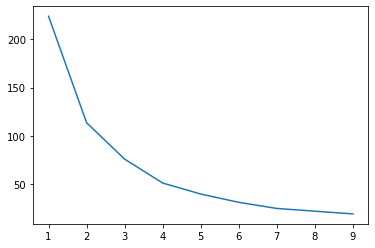

In [85]:
plt.plot(K,SSD)

In [86]:
#we can either choose 2 or 4 as the value for the k

In [87]:
kmean = KMeans(n_clusters = 2)
kmean.fit(df1)

KMeans(n_clusters=2)

In [88]:
kmean.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [89]:
kmean.cluster_centers_

array([[ 1.07839292,  0.12673252],
       [-1.02076794, -0.10814205]])

In [90]:
kmean.inertia_

113.60525560139604

In [91]:
df1['cluster3'] = kmean.labels_
df1.head()

x         y  cluster3
0  1.557994  0.255070         0
1 -0.955949  1.675355         1
2 -1.204858  0.037380         1
3 -0.612919 -0.390663         1
4  1.437055 -1.832274         0

In [93]:
cluster00 = df1[df1.cluster3 == 0]
cluster01 = df1[df1.cluster3 == 1]

In [94]:
centroids_kmean = pd.DataFrame(data = kmean.cluster_centers_, columns = ['x','y'])
centroids_kmean

x         y
0  1.078393  0.126733
1 -1.020768 -0.108142

In [96]:
plt.scatter(cluster00['x'], cluster00['y'], color = 'blue')
plt.scatter(cluster01['x'], cluster01['y'], color = 'green')
plt.scatter(centroids_kmean.x, centroids_kmean.y,   color = 'black', marker= '*')

In [ ]:
#for the above dataset, kmean clustering algorithm was a better options because in the scatter plot itself we could 
#clearly see two different clusters formed.

# Part C

### INSTRUCTIONS:

1. Read data from file3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [97]:
df2 = pd.read_csv("file3.csv")
df2.columns = ['apple','mango']
df2.head()

apple     mango
0 -0.626877  0.307585
1 -0.574917 -2.120564
2 -1.282412  0.106262
3  4.502644 -5.152151
4  4.014903 -8.163330

In [98]:
x = df2['apple']
y = df2['mango']
plt.scatter(x,y)
plt.xlabel['apple']
plt.ylabel['mango']
plt.show()

TypeError: 'function' object is not subscriptable

# KMean

In [99]:
from sklearn.cluster import KMeans

In [101]:
K = np.arange(1,10)
SSD = []
for k in K:
    km2 = KMeans(n_clusters = k)
    km2.fit(df2)
    SSD.append(km2.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [102]:
km2.cluster_centers_

array([[-2.12500668, -1.34470399],
       [ 5.17193079, -6.66885909],
       [-0.76081465,  0.24657032],
       [ 4.55606483, -7.88233479],
       [ 6.11676033, -5.90171877],
       [ 6.85406063, -7.55360308],
       [-3.14279796,  0.35300071],
       [ 2.86428637, -6.78050549],
       [ 4.1110467 , -5.5702414 ]])

In [103]:
plt.plot(K,SSD)

In [104]:
kmean = KMeans(n_clusters = 3)
kmean.fit(df2)

KMeans(n_clusters=3)

In [105]:
kmean.labels_

array([1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0])

In [106]:
df2['kcluster'] = kmean.labels_
df2.head()

apple     mango  kcluster
0 -0.626877  0.307585         1
1 -0.574917 -2.120564         1
2 -1.282412  0.106262         1
3  4.502644 -5.152151         2
4  4.014903 -8.163330         2

In [107]:
kmean.cluster_centers_

array([[ 5.87481741, -6.75511481],
       [-2.02312411, -0.37735722],
       [ 3.49713387, -6.41461402]])

In [108]:
kmean.inertia_

181.58671013249088

In [110]:
kcluster0 = df2[df2.kcluster == 0]
kcluster0.head()

apple     mango  kcluster
6   5.396174 -6.850239         0
8   4.757302 -7.362132         0
9   5.469759 -5.409485         0
13  5.792518 -7.019013         0
15  4.742397 -7.571806         0

In [111]:
kcluster1 = df2[df2.kcluster == 1]
kcluster1.head()

apple     mango  kcluster
0 -0.626877  0.307585         1
1 -0.574917 -2.120564         1
2 -1.282412  0.106262         1
5 -1.385723 -1.732714         1
7 -0.695103  0.035833         1

In [112]:
kcluster2 = df2[df2.kcluster == 2]
kcluster2.head()

apple     mango  kcluster
3   4.502644 -5.152151         2
4   4.014903 -8.163330         2
11  4.103238 -5.904951         2
21  1.853156 -8.367773         2
26  3.643367 -6.532633         2

In [113]:
kcluster3 = df2[df2.kcluster == 3]
kcluster3.head()

Empty DataFrame
Columns: [apple, mango, kcluster]
Index: []

In [114]:
centroids = pd.DataFrame(data = kmean.cluster_centers_, columns=['x','y'])
centroids

x         y
0  5.874817 -6.755115
1 -2.023124 -0.377357
2  3.497134 -6.414614

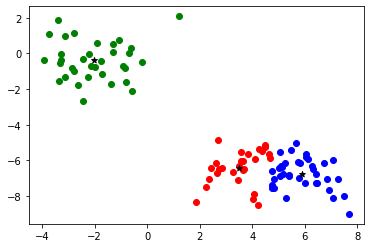

In [115]:
plt.scatter(kcluster0['apple'], kcluster0['mango'], color = 'blue')
plt.scatter(kcluster1['apple'], kcluster1['mango'], color = 'green')
plt.scatter(kcluster2['apple'], kcluster2['mango'], color = 'red')
plt.scatter(centroids.x, centroids.y, color='black', marker = '*')

# DBSCAN

In [116]:
newdf = df2.drop(['kcluster'],axis = 1)
newdf.head()

apple     mango
0 -0.626877  0.307585
1 -0.574917 -2.120564
2 -1.282412  0.106262
3  4.502644 -5.152151
4  4.014903 -8.163330

In [117]:
from sklearn.cluster import DBSCAN

In [118]:
dbscan = DBSCAN(min_samples = 8, eps = 1)
dbscan.fit(newdf)

DBSCAN(eps=1, min_samples=8)

In [119]:
dbscan.labels_

array([ 0, -1,  0,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1, -1,  1,  1,
        1,  0,  1,  1, -1,  0,  0,  0, -1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  0, -1,  1, -1,  0,  0,  0,  0,  1,  0, -1,  1,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  0,  1,  1,  0, -1,  1,  1,  1, -1,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1],
      dtype=int64)

In [120]:
newdf['dbcluster'] = dbscan.labels_
newdf.head()

apple     mango  dbcluster
0 -0.626877  0.307585          0
1 -0.574917 -2.120564         -1
2 -1.282412  0.106262          0
3  4.502644 -5.152151          1
4  4.014903 -8.163330          1

In [121]:
cl0 = newdf[newdf.dbcluster == -1]
cl1 = newdf[newdf.dbcluster == 0]
cl2 = newdf[newdf.dbcluster == 1]

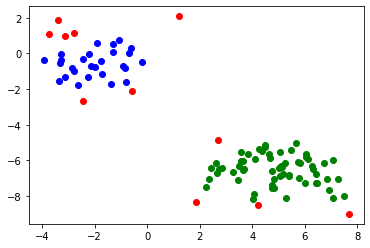

In [123]:
plt.scatter(cl0['apple'], cl0['mango'], color = 'red')
plt.scatter(cl1['apple'], cl1['mango'], color = 'blue')
plt.scatter(cl2['apple'], cl2['mango'], color = 'green')

In [ ]:
#for this dataset, dbscan gives the better graph as with dbscan , we could clearly see two diffent clusters formed and
#those datapoints which are far from the clusters are marked as the outliers unlike KMean algorithm.